# Título

- Modelo de Comércio Gravitacional
- Quociente Locacional
- Coeficiente de Localização
- Coeficiente de Associação Geográfica
- Coeficiente de Redistribuição
- Curvas de Localização
- Coeficiente de Especialização
- Coeficiente de Reestruturação

In [8]:
import geopandas
import pygeoda

In [5]:
gdf = geopandas.read_file("dados/MG/Shape_Dados_MG/MG_Mun97_region.shp")

In [11]:
print(gdf.columns)

Index(['CODMUN6', 'MUNIC_PIO', 'SEM_ACENTO', 'MUNIC_PI0', 'UF', 'UF_IBGE',
       'REGI_O', 'MESO_IBGE', 'MESO_IBG0', 'MICRO_IBGE', 'MICRO_IB0',
       'MESO_IBG1', 'MICRO_IB1', 'AREA_97', 'SEDE', 'SEDE0', 'N91', 'N96',
       'CODCOMP', 'C__DIGO', 'REGI__O', 'UF_1', 'MUNIC__PIO', 'POP_91',
       'PIND_91', 'PMPOB_91', 'NEPOB_91', 'NPOB_91', 'PIND_BR_91', 'POP_00',
       'PIND_00', 'PMPOB_00', 'NEPOB_00', 'NPOB_00', 'PIND_BR_00', 'POP_10',
       'PIND_10', 'PMPOB_10', 'NEPOB_10', 'NPOB_10', 'PIND_BR_10', 'GINI_91',
       'GINI_00', 'GINI_10', 'GINI_BR_91', 'GINI_BR_00', 'GINI_BR_10',
       'GDP_99', 'GDP_14', 'GDPPC_99', 'GDPPC_14', 'POP_99', 'POP_14',
       'GDPPC_BR_9', 'GDPPC_BR_1', 'IDHM_91', 'IDHM_E_91', 'IDHM_L_91',
       'IDHM_R_91', 'IDHM_00', 'IDHM_E_00', 'IDHM_L_00', 'IDHM_R_00',
       'IDHM_10', 'IDHM_E_10', 'IDHM_L_10', 'IDHM_R_10', 'VAAGR_14',
       'VAIND_14', 'VASER_14', 'VAADM_14', 'geometry'],
      dtype='object')


<Axes: >

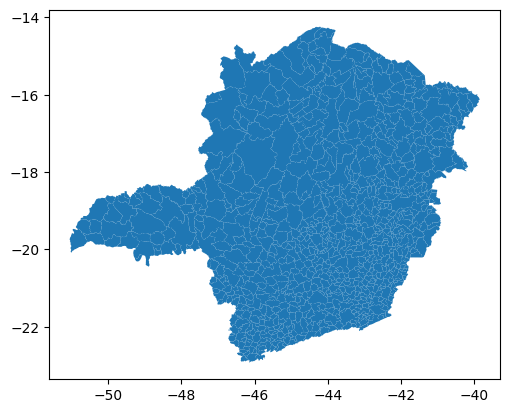

In [7]:
gdf.plot()

In [9]:
mg = pygeoda.open(gdf)

In [12]:
queen_w = pygeoda.queen_weights(mg)
crm_prp = gdf['GDPPC_14']
crm_lisa = pygeoda.local_moran(queen_w, crm_prp)

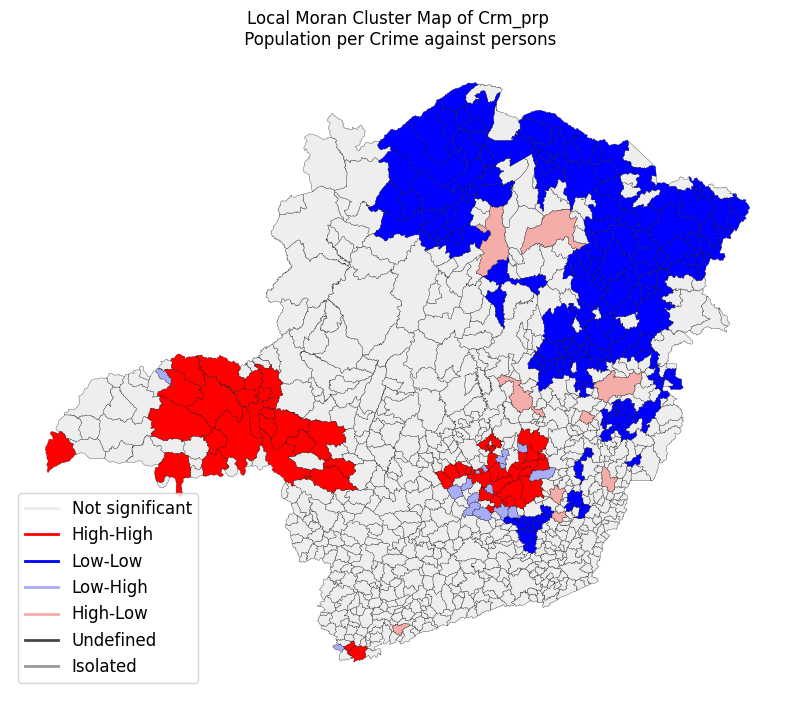

In [13]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
lisa_colors = crm_lisa.lisa_colors()
lisa_labels = crm_lisa.lisa_labels()

# attach LISA cluster indicators to geodataframe
gdf['LISA'] = crm_lisa.lisa_clusters()

for ctype, data in gdf.groupby('LISA'):
    color = lisa_colors[ctype]
    lbl = lisa_labels[ctype]
    data.plot(color = color,
        ax = ax,
        label = lbl,
        edgecolor = 'black',
        linewidth = 0.2)

# Place legend in the lower right hand corner of the plot
lisa_legend = [matplotlib.lines.Line2D([0], [0], color=color, lw=2) for color in lisa_colors]
ax.legend(lisa_legend, lisa_labels,loc='lower left', fontsize=12, frameon=True)
ax.set(title='Local Moran Cluster Map of Crm_prp\n Population per Crime against persons')
ax.set_axis_off()

## Modelo de Comércio Gravitacional

> *Everything is related to everything else, but near things are more related than distant things.*
>
> *Waldo Tobler*

## Quociente Locacional

## Coeficiente de Localização

## Coeficiente de Associação Geográfica

## Coeficiente de Redistribuição

## Curvas de Localização

## Coeficiente de Especialização e Coeficiente de Reestruturação